# Phase 2 - Data Cleaning and Preprocessing

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset from csv into a pandas df
churn_data = pd.read_csv('/Users/kareemelnaghy/.cache/kagglehub/datasets/mfarhi/churn-prediction/versions/1/bank_data_train.csv')

In [172]:
churn_data.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [173]:
# print the unique datatypes that exist in the df
churn_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [174]:
# print the shape of the df before pre processing
print(f"The shape of the df before pre processing: {churn_data.shape}")

The shape of the df before pre processing: (355190, 116)


In [175]:
# statistical distribution of original dataset
stats = churn_data.describe()
print(stats)

                  ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  \
count  355190.000000   355190.000000       316867.000000   
mean   368794.674875        0.105225            0.044045   
std    128148.804566        0.431372            0.108449   
min    146841.000000        0.000000            0.000000   
25%    257846.250000        0.000000            0.000000   
50%    368778.500000        0.000000            0.000000   
75%    479737.750000        0.000000            0.036608   
max    590828.000000       11.000000            1.000000   

       PRC_ACCEPTS_A_EMAIL_LINK  APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  \
count                  155163.0          60550.000000           155163.0   
mean                        0.0             50.947498                0.0   
std                         0.0             21.777855                0.0   
min                         0.0              0.000000                0.0   
25%                         0.0             33.000000                0.0   
50%

## Removing Missing Values and Duplicate Rows

In [176]:
# First, we will remove features that are missing more than 70% of their values.
features = churn_data.columns.to_list()
features.sort() # to match the dataset description

numerical_feat = churn_data.select_dtypes(include=[np.number]).columns.tolist()
non_numerical_feat = churn_data.select_dtypes(exclude=[np.number]).columns.tolist()

# check for missing values in numerical features
missing_values = []
for feature in numerical_feat:
    missing_percentage = churn_data[feature].isnull().mean() * 100
    missing_values.append(missing_percentage)
missing_df_num = pd.DataFrame({'Feature': numerical_feat, 'MissingPercentage': missing_values})

# check for missing values in non-numerical features
missing_values = []
for feature in non_numerical_feat:
    missing_percentage = churn_data[feature].isnull().mean() * 100
    missing_values.append(missing_percentage)
missing_df_non_num = pd.DataFrame({'Feature': non_numerical_feat, 'MissingPercentage': missing_values})

# drop features with more than 70% missing values
missing_feat = numerical_feat + non_numerical_feat
high_missing_features = [feature for feature in missing_feat if churn_data[feature].isnull().mean() > 0.7]

churn_data = churn_data.drop(columns=high_missing_features)
print(f"Shape after removing missing features: {churn_data.shape}")


Shape after removing missing features: (355190, 69)


In [177]:
# check for duplicate rows
duplicate_rows = churn_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
# drop duplicate rows
churn_data = churn_data.drop_duplicates()
print(f"Shape after removing duplicate rows: {churn_data.shape}")

Number of duplicate rows: 0
Shape after removing duplicate rows: (355190, 69)


## Handling Categorical features and One-Hot Encoding

In [178]:
# remove categorical features with high cardinality (>10 unique values) since these are inefficient to encode
features = churn_data.columns.tolist()
categorical_feat = []

# identify categorical features
for feature in features:
  if churn_data[feature].dtype == 'object':
    print(f'{feature} with {churn_data[feature].nunique()} unique values')
    categorical_feat.append(feature)

# drop high cardinality categorical features
churn_data = churn_data.drop(columns='CLNT_JOB_POSITION')

# one hot encode 'PACK'
churn_data = pd.get_dummies(churn_data, columns=['PACK'], drop_first=True)
print(f"Shape after removing high cardinality categorical features: {churn_data.shape}")

CLNT_JOB_POSITION with 19588 unique values
PACK with 12 unique values
Shape after removing high cardinality categorical features: (355190, 78)


## Handling Missing Values using KNNImputer

In [179]:
from sklearn.impute import KNNImputer

# handle missing values in numerical features
features = churn_data.columns.tolist()
numerical_feat = []
for feature in features:
    if churn_data[feature].dtype != 'object':
        numerical_feat.append(feature)
# Determine each features distribution and choose based imputation strategy
imputation_strategies = {}
for feature in numerical_feat:
    if feature in ['ID', 'TARGET']:
        continue
        
    missing_percent = churn_data[feature].isnull().mean() * 100
    if missing_percent > 0:
        data = churn_data[feature].dropna()
        skewness = data.skew()
        unique_ratio = data.nunique() / len(data)
        
        # Choose strategy based on distribution
        if unique_ratio < 0.05:  # few unique values
            strategy = "mode"
        elif abs(skewness) < 0.5:  # Roughly normal
            strategy = "mean"
        elif feature.startswith('CNT_') or feature.startswith('AMOUNT_'):  # Count/Amount features
            strategy = "zero"  
        else:
            strategy = "median"  # For skewed distributions
            
        imputation_strategies[feature] = strategy

# Apply the chosen strategies

for feature, strategy in imputation_strategies.items():
    if strategy == "mean":
        fill_value = churn_data[feature].mean()
        churn_data[feature] = churn_data[feature].fillna(fill_value)
        
    elif strategy == "median":
        fill_value = churn_data[feature].median()
        churn_data[feature] = churn_data[feature].fillna(fill_value)
        
    elif strategy == "mode":
        fill_value = churn_data[feature].mode().iloc[0]
        churn_data[feature] = churn_data[feature].fillna(fill_value)
        
    elif strategy == "zero":
        churn_data[feature] = churn_data[feature].fillna(0)

print(f"\nRemaining missing values: {churn_data[numerical_feat].isnull().sum().sum()}")
print(churn_data.head())


Remaining missing values: 0
       ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       0.0   
1  146842               0            0.041033                       0.0   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       0.0   
4  146845               0            0.000000                       0.0   

   PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  TURNOVER_DYNAMIC_IL_1M  \
0                0.0               0.0                     0.0   
1                0.0               0.0                     0.0   
2                0.0               0.0                     0.0   
3                0.0               0.0                     0.0   
4                0.0               0.0                     0.0   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  ...  \
0            0.000000                    0.0 

## Removing Low Variance Features

In [180]:
# remove features with low variance
features = churn_data.columns.to_list()
features.sort() # to match the dataset description
features_low_variance = [];
for feature in features:
  if feature in ['ID', 'TARGET']:
    continue
  if churn_data[feature].dtype == 'object':
    continue
  variance = churn_data[feature].var()
  if variance < 0.01:
    print(f'{feature} has low variance: {variance}')
    features_low_variance.append(feature)

print(f"Total features with low variance: {len(features_low_variance)}")

# drop features with low variance
churn_data = churn_data.drop(columns=features_low_variance)
print(f"Shape after removing low variance features: {churn_data.shape}")

AMOUNT_RUB_NAS_PRC has low variance: 0.007406222898637513
CNT_ACCEPTS_MTP has low variance: 0.0
CNT_ACCEPTS_TK has low variance: 0.0
CR_PROD_CNT_CCFP has low variance: 0.005842857266035602
LDEAL_GRACE_DAYS_PCT_MED has low variance: 0.001542809825523323
PACK_108 has low variance: 5.630773302162204e-06
PACK_109 has low variance: 0.00024206599118132709
PACK_M01 has low variance: 1.9707429131154717e-05
PRC_ACCEPTS_A_AMOBILE has low variance: 0.0
PRC_ACCEPTS_A_ATM has low variance: 0.0
PRC_ACCEPTS_A_EMAIL_LINK has low variance: 0.0
PRC_ACCEPTS_A_MTP has low variance: 0.0
PRC_ACCEPTS_A_POS has low variance: 0.0
PRC_ACCEPTS_A_TK has low variance: 0.0
PRC_ACCEPTS_MTP has low variance: 0.0
PRC_ACCEPTS_TK has low variance: 0.0
REST_DYNAMIC_CC_1M has low variance: 0.0006948735541004912
REST_DYNAMIC_CC_3M has low variance: 0.004446322244252123
REST_DYNAMIC_FDEP_1M has low variance: 0.0001982714807069353
REST_DYNAMIC_FDEP_3M has low variance: 0.0020763994469395197
REST_DYNAMIC_IL_1M has low varianc

## Visualizing and Handling features with low correlation

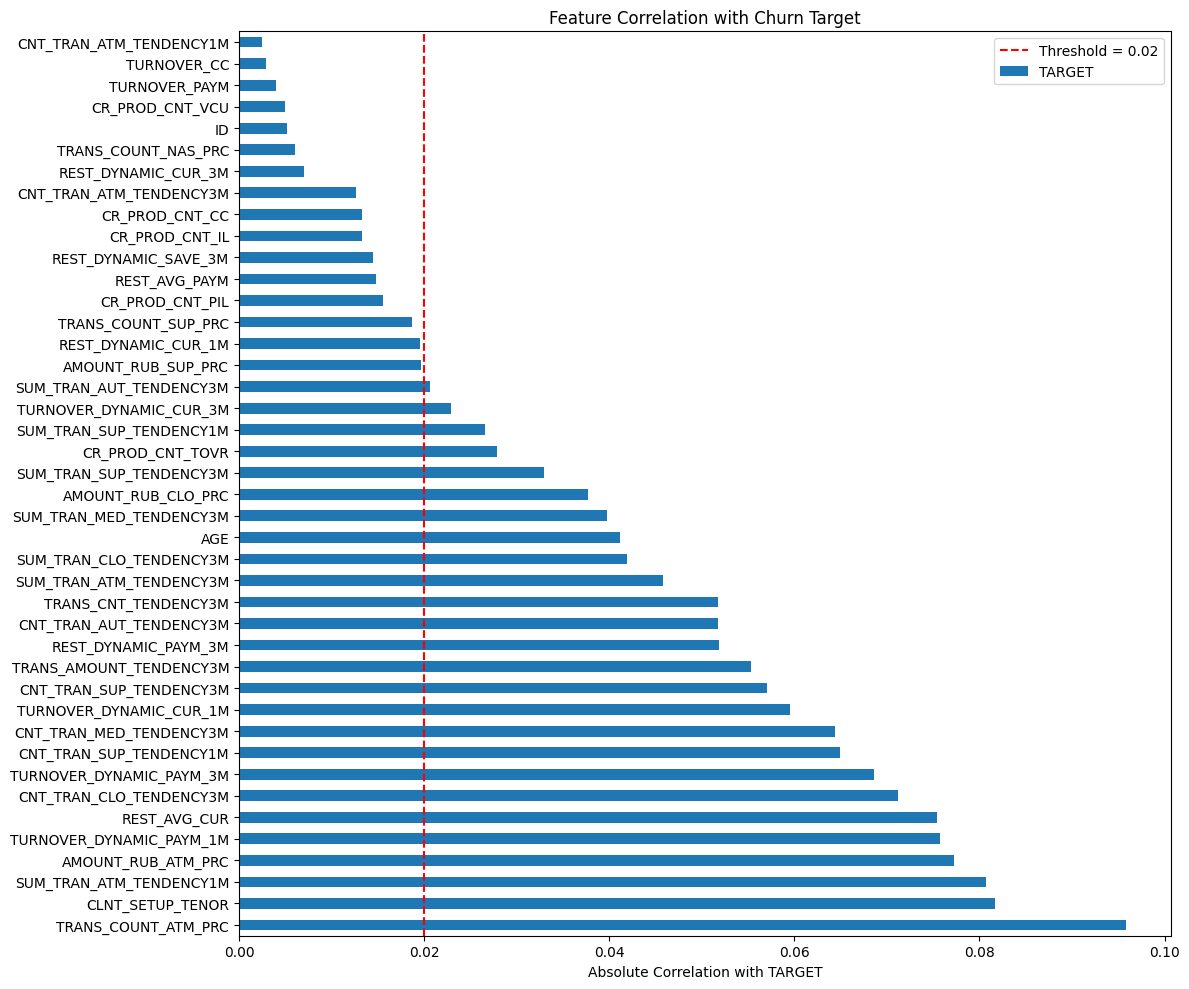

Features with correlation less than 0.02: ['AMOUNT_RUB_SUP_PRC', 'REST_DYNAMIC_CUR_1M', 'TRANS_COUNT_SUP_PRC', 'CR_PROD_CNT_PIL', 'REST_AVG_PAYM', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_IL', 'CR_PROD_CNT_CC', 'CNT_TRAN_ATM_TENDENCY3M', 'REST_DYNAMIC_CUR_3M', 'TRANS_COUNT_NAS_PRC', 'CR_PROD_CNT_VCU', 'TURNOVER_PAYM', 'TURNOVER_CC', 'CNT_TRAN_ATM_TENDENCY1M']
Shape after removing low correlation features: (355190, 36)


In [181]:
# Calculate correlation with TARGET using only numeric columns to avoid conversion errors from object columns
numeric_cols = churn_data.select_dtypes(include=[np.number])
if 'TARGET' not in numeric_cols.columns:
	raise KeyError("TARGET column is not numeric or is missing from the dataframe.")
target_corr = numeric_cols.corr()['TARGET'].abs().sort_values(ascending=False)

# Visualize correlation with target
plt.figure(figsize=(12, 10))
target_corr[1:].plot(kind='barh')
plt.xlabel('Absolute Correlation with TARGET')
plt.title('Feature Correlation with Churn Target')
plt.axvline(x=0.02, color='r', linestyle='--', label='Threshold = 0.02') # set the threshold line to 0.02 considering that the highest absolute correlation is near 0.1
plt.legend()
plt.tight_layout()
plt.savefig('target_correlation.png')
plt.show()

# remove features with correlation less than 0.02
low_corr_features = target_corr[target_corr < 0.02].index.tolist()
low_corr_features.remove('ID')
print(f"Features with correlation less than 0.02: {low_corr_features}")
churn_data = churn_data.drop(columns=low_corr_features)
print(f"Shape after removing low correlation features: {churn_data.shape}")

In [182]:
# # plot the distribution of select features 
# for feature in churn_data.columns.tolist():
#     plt.figure(figsize=(8, 6))
#     sns.histplot(churn_data[feature].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.grid()
#     plt.show()

## Normalization through Min-Max Scaling and Standard Scaling

In [ ]:
# # Normalization: decide between standard and min-max normalization based on distribution
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Apply normalization
# scalers = {}
# for feature in churn_data.columns:
#     if feature in ['ID', 'TARGET']:
#         continue
    
#     data = churn_data[feature]
#     skewness = data.skew()
    
#     if abs(skewness) < 0.5:  # almost normal
#         scaler = StandardScaler()
#     else:
#         scaler = MinMaxScaler()
        
#     churn_data[feature] = scaler.fit_transform(churn_data[[feature]])
#     scalers[feature] = scaler

    

## Visualizing Correlation

In [184]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # calculate correlations with TARGET
# correlations = churn_data.corr()['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)

# # create horizontal bar plot
# plt.figure(figsize=(10, 12))
# colors = ['red' if x < 0 else 'blue' for x in correlations.values]
# bars = plt.barh(range(len(correlations)), correlations.values, color=colors, alpha=0.7)
# plt.yticks(range(len(correlations)), correlations.index)
# plt.xlabel('Correlation with TARGET (Churn)')
# plt.title('Feature Correlations with Customer Churn')
# plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
# plt.grid(axis='x', alpha=0.3)

# # add correlation values on bars
# for i, (bar, val) in enumerate(zip(bars, correlations.values)):
#     plt.text(val + (0.002 if val >= 0 else -0.002), i, f'{val:.3f}', 
#              va='center', ha='left' if val >= 0 else 'right', fontsize=8)

# plt.tight_layout()
# plt.show()

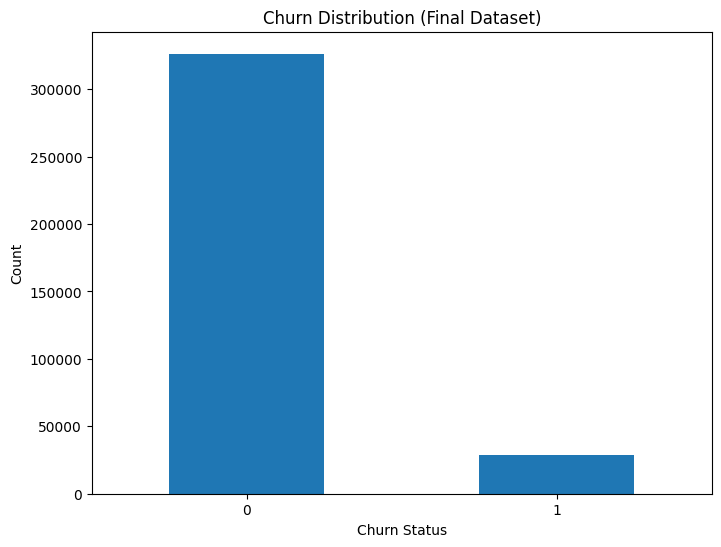

In [185]:
# TARGET distribution showing the imbalance between churners and non-churners
plt.figure(figsize=(8, 6))
churn_data['TARGET'].value_counts().plot(kind='bar')
plt.title('Churn Distribution (Final Dataset)')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('target_distribution.png')


## Final Cleaned Dataset

In [186]:
# export dataframe to csv
churn_data['AGE'] = churn_data['AGE'].astype(int) / 12
churn_data.to_csv('churn_data_cleaned.csv', index=False)
print(churn_data.shape)

(355190, 36)


In [187]:
# statistical distribution
stats = churn_data.describe()
print(stats)

                  ID  AMOUNT_RUB_CLO_PRC  SUM_TRAN_AUT_TENDENCY3M  \
count  355190.000000       355190.000000            355190.000000   
mean   368794.674875            0.039293                 0.689080   
std    128148.804566            0.103339                 0.168711   
min    146841.000000            0.000000                 0.000002   
25%    257846.250000            0.000000                 0.689080   
50%    368778.500000            0.000000                 0.689080   
75%    479737.750000            0.028539                 0.689080   
max    590828.000000            1.000000                 1.000000   

       CNT_TRAN_AUT_TENDENCY3M  REST_AVG_CUR  CR_PROD_CNT_TOVR  \
count            355190.000000  3.551900e+05     355190.000000   
mean                  0.903609  6.635854e+04          0.309930   
std                   0.210578  1.878598e+05          0.588759   
min                   0.008000  0.000000e+00          0.000000   
25%                   1.000000  4.070440e+03    